<a href="https://colab.research.google.com/github/AKSHITAMODA/ACM-TASKS/blob/main/TASK1_ACM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload the kaggle dataset from the local storage
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon (1).csv


In [ ]:
!pip install pandas matplotlib scikit-learn

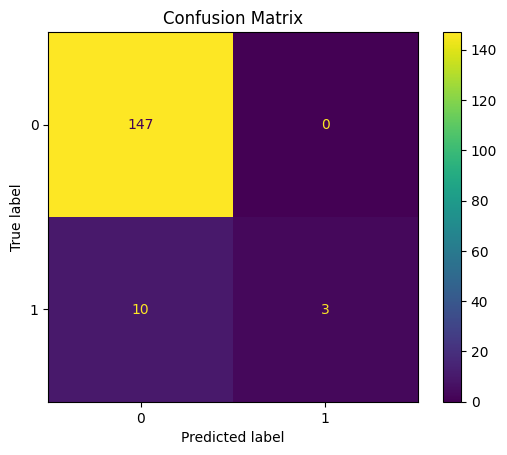

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


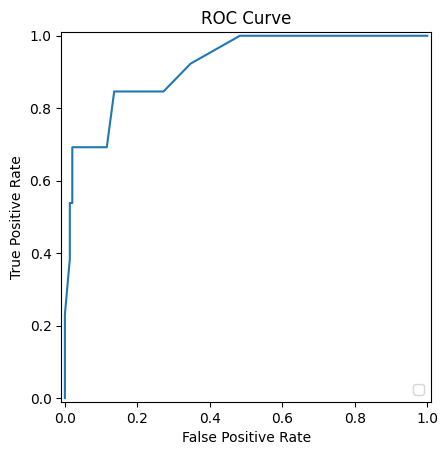

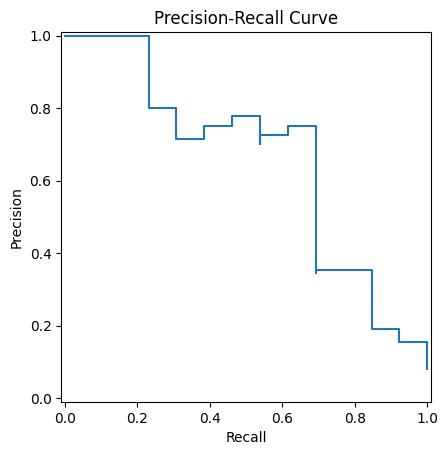

Final output saved to pokemon_mega_classification.csv


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, RocCurveDisplay, precision_recall_curve,
                             PrecisionRecallDisplay)

from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("Pokemon.csv")

data['Mega_Evolution'] = data['Name'].apply(lambda x: 'Yes' if 'Mega' in x else 'No')

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categorical_cols = ['Type 1', 'Type 2']
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

X = pd.concat([data.drop(columns=['Name', 'Mega_Evolution', 'Legendary', 'Type 1', 'Type 2']), encoded_df], axis=1)

y = data['Mega_Evolution'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion Matrix evaluates by
#True Positives (TP) – Correctly predicted Mega Evolutions.
#True Negatives (TN) – Correctly predicted Non-Mega Evolutions.
#False Positives (FP) – Wrongly predicted as Mega Evolution.
#False Negatives (FN) – Missed Mega Evolutions.
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

# ROC Curve(TPR: True positive rate, FPR: False positive rate)
fpr, tpr, _ = roc_curve(y_test, y_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
plt.show()

# Precision-Recall Curve(class imbalance by percentages)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve')
plt.show()

output = data[['Name']].copy()
output['Mega_Evolution'] = ['Yes' if 'Mega' in name else 'No' for name in data['Name']]
output.to_csv('pokemon_mega_classification.csv', index=False)
print('Final output saved to pokemon_mega_classification.csv')

In [ ]:
#used to access the csv file that is saved as output and print it
import pandas as pd

df = pd.read_csv('pokemon_mega_classification.csv')

print(df)

                      Name Mega_Evolution
0                Bulbasaur             No
1                  Ivysaur             No
2                 Venusaur             No
3    VenusaurMega Venusaur            Yes
4               Charmander             No
..                     ...            ...
795                Diancie             No
796    DiancieMega Diancie            Yes
797    HoopaHoopa Confined             No
798     HoopaHoopa Unbound             No
799              Volcanion             No

[800 rows x 2 columns]


In [ ]:
#used to download the new csv file in the output format in local storage
from google.colab import files
files.download('pokemon_mega_classification.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>